In [6]:
# import packages
import pandas as pd # For reading and manipulating 2D data (like spreadsheets)
import numpy as np # For doing numerical calculations (literally NUMerical PYthon)
import matplotlib.pyplot as plt # For making graphs

from sklearn import datasets, linear_model

# Setting to show graphs below cells in colab
%matplotlib inline

In [7]:
co2 = pd.read_csv(r"../data/CO2.csv")
co2["Log CO2"] = co2["CO2"].map(lambda x: np.log(x))
ph = pd.read_csv(r"../data/PH.csv")

joint = pd.merge(co2, ph, on='Year', how='inner')
joint = joint.dropna()

joint

,Year,CO2,Log CO2,PH
0,1988,2.207738e+10,23.817820,8.109450
1,1989,2.237897e+10,23.831388,8.107480
2,1990,2.275270e+10,23.847950,8.118611
3,1991,2.322948e+10,23.868688,8.111090
4,1992,2.256720e+10,23.839763,8.107482
5,1993,2.279835e+10,23.849954,8.109917
6,1994,2.303478e+10,23.860271,8.107044
7,1995,2.352449e+10,23.881308,8.103833
8,1996,2.425016e+10,23.911689,8.096020
9,1997,2.439595e+10,23.917683,8.099920


In [8]:
co2_array = joint["Log CO2"].to_numpy().reshape(-1, 1)
ph_array = joint["PH"].to_numpy().reshape(-1, 1)

regr = linear_model.LinearRegression(fit_intercept=True)
model_2 = regr.fit(co2_array, ph_array)
print(f"The model [ y = {regr.coef_[0][0]} x + {regr.intercept_[0]}] has score " + 
      f"{regr.score(co2_array, ph_array)}.")

The model [ y = -0.09285252711581084 x + 10.321375225181184] has score 0.901306908291701.


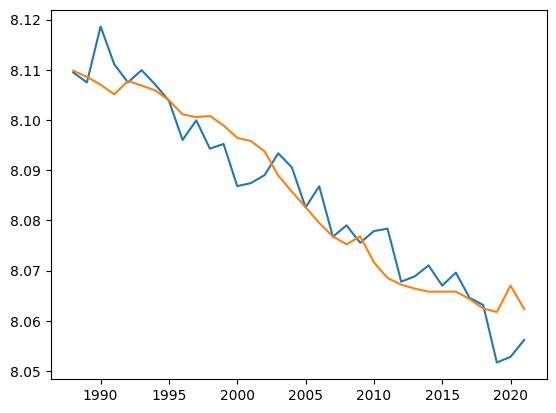

In [10]:
def co2_to_ph(array):
    array = np.log(array)
    predict_array = model_2.predict(array)

    return predict_array

# inspect the fit in historical data
gdp_predict = co2_to_ph(joint["CO2"].to_numpy().reshape(-1, 1))
plt.plot(np.asarray(joint["Year"], float), joint["PH"])
plt.plot(np.asarray(joint["Year"], float), gdp_predict)
plt.show()